# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfull

# Importings

In [8]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import MFPT
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['MFPT'])
downloader.download_extract('MFPT.zip', 'MFPT/')

# Instantiating a digestor object

In [3]:
mfpt = MFPT('MFPT/MFPT Fault Data Sets/', [
    '1 - Three Baseline Conditions',
    '2 - Three Outer Race Fault Conditions',
    '3 - Seven More Outer Race Fault Conditions',
    '4 - Seven Inner Race Fault Conditions',
])
mining_params = {
    97656: {'win_len': 16671, 'hop_len': 2000},
    48828: {'win_len': 8337, 'hop_len': 1000},
}
mfpt.mine(mining_params)

# Aggregating the data recorded at 48828 Hz

In [4]:
df = pd.concat(mfpt.data[48828]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,8331,8332,8333,8334,8335,8336,Fs,load,rot_speed,state
0,-0.190937,0.378588,-0.490422,-1.442238,-0.051721,-0.428069,-0.656600,0.154819,-0.165624,0.138256,...,0.477637,0.310549,-0.486780,1.008681,1.973270,0.014804,48828,5,25,OR
1,0.985570,1.528132,1.166798,1.804840,0.136606,-0.444940,0.634646,0.592880,-0.172613,-0.709712,...,-0.555015,-0.437741,-0.217456,0.394339,1.813208,-0.340981,48828,5,25,OR
2,-0.710302,-0.726792,0.444288,-0.230426,0.743183,2.364421,-0.180058,-0.472887,-0.975517,-0.169131,...,-0.284190,0.323076,-0.155004,0.493425,0.662359,-0.422113,48828,5,25,OR
3,-0.489143,0.019271,-0.348365,0.377997,1.174083,0.532484,-0.967210,-0.215117,-0.132693,0.017302,...,-2.915880,-1.967240,-1.461447,-1.681819,-3.130149,-1.986240,48828,5,25,OR
4,0.938070,0.278812,1.789827,1.254427,2.114565,0.990776,0.126996,0.384187,0.611524,1.394369,...,-0.194616,-0.122824,0.054416,0.301516,-0.707878,-1.143872,48828,5,25,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,-0.230820,-0.790745,0.025854,0.201064,-0.548063,-0.909767,-0.839439,-0.679033,-0.491099,-0.703546,...,0.509361,0.721611,0.855363,0.290441,-0.004898,0.272807,48828,3,25,IR
1942,-0.284608,-0.134428,-0.334139,1.513390,0.178323,-0.398191,-1.127591,-0.356363,0.749201,0.402916,...,-0.213912,-0.462882,0.138403,0.439809,-0.295757,0.332970,48828,3,25,IR
1943,0.931031,1.508049,1.777522,0.967493,0.836941,0.520904,-0.444128,-0.654865,-0.066033,-0.035638,...,-1.742745,-0.446306,-0.275613,-1.514215,-1.291886,-0.547804,48828,3,25,IR
1944,-0.799814,-0.954929,-0.645598,1.089000,0.379178,-2.049443,-1.156781,-1.620229,-0.118172,-0.314733,...,-1.741047,0.355268,-0.063067,1.540943,-0.970865,-3.165983,48828,3,25,IR


In [5]:
signals, metadata = df.iloc[:, : - 4], df.iloc[:, - 4 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,8327,8328,8329,8330,8331,8332,8333,8334,8335,8336
0,-0.190937,0.378588,-0.490422,-1.442238,-0.051721,-0.428069,-0.656600,0.154819,-0.165624,0.138256,...,-1.544105,-0.186346,0.480972,0.054982,0.477637,0.310549,-0.486780,1.008681,1.973270,0.014804
1,0.985570,1.528132,1.166798,1.804840,0.136606,-0.444940,0.634646,0.592880,-0.172613,-0.709712,...,-1.792633,0.365347,0.498470,-0.398966,-0.555015,-0.437741,-0.217456,0.394339,1.813208,-0.340981
2,-0.710302,-0.726792,0.444288,-0.230426,0.743183,2.364421,-0.180058,-0.472887,-0.975517,-0.169131,...,0.010177,-1.666413,-0.462193,-0.095431,-0.284190,0.323076,-0.155004,0.493425,0.662359,-0.422113
3,-0.489143,0.019271,-0.348365,0.377997,1.174083,0.532484,-0.967210,-0.215117,-0.132693,0.017302,...,-1.868412,-0.944457,-1.729467,-2.656622,-2.915880,-1.967240,-1.461447,-1.681819,-3.130149,-1.986240
4,0.938070,0.278812,1.789827,1.254427,2.114565,0.990776,0.126996,0.384187,0.611524,1.394369,...,-0.996436,-0.205396,-0.512019,-0.346519,-0.194616,-0.122824,0.054416,0.301516,-0.707878,-1.143872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,-0.230820,-0.790745,0.025854,0.201064,-0.548063,-0.909767,-0.839439,-0.679033,-0.491099,-0.703546,...,0.085144,0.338052,0.070881,0.367426,0.509361,0.721611,0.855363,0.290441,-0.004898,0.272807
1942,-0.284608,-0.134428,-0.334139,1.513390,0.178323,-0.398191,-1.127591,-0.356363,0.749201,0.402916,...,-0.506888,-0.956246,-0.803839,-0.162990,-0.213912,-0.462882,0.138403,0.439809,-0.295757,0.332970
1943,0.931031,1.508049,1.777522,0.967493,0.836941,0.520904,-0.444128,-0.654865,-0.066033,-0.035638,...,-0.495529,0.493770,0.659627,-0.834037,-1.742745,-0.446306,-0.275613,-1.514215,-1.291886,-0.547804
1944,-0.799814,-0.954929,-0.645598,1.089000,0.379178,-2.049443,-1.156781,-1.620229,-0.118172,-0.314733,...,-0.995907,-2.718988,1.922668,0.230709,-1.741047,0.355268,-0.063067,1.540943,-0.970865,-3.165983


In [6]:
metadata

,Fs,load,rot_speed,state
0,48828,5,25,OR
1,48828,5,25,OR
2,48828,5,25,OR
3,48828,5,25,OR
4,48828,5,25,OR
...,...,...,...,...
1941,48828,3,25,IR
1942,48828,3,25,IR
1943,48828,3,25,IR
1944,48828,3,25,IR


# Signal Processing

## Envelope Extraction

In [9]:
signals_env = env(signals)
signals_env.shape

(1946, 8337)

## FFT

In [10]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 23500], 'bandpass', fs = float(metadata.iloc[0, 0]), output='sos')

In [11]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1946, 4168)

## ZoomedFFT

In [12]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 2500, 2500, float(metadata.iloc[0, 0]), freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1946, 2500)

## STFT

In [13]:
STFT_window = scipy.signal.windows.hann(2400)
STFT_freq_filter = scipy.signal.butter(25, [5, 23500], 'bandpass', fs = float(metadata.iloc[0, 0]), output='sos')
signals_env_STFT = stft(signals_env, 2400, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1946, 30, 1200)

## Statistical Features

In [15]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [16]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,-0.191650,0.914853,0.975491
1,-0.187638,0.934313,0.984643
2,-0.186269,0.949628,0.992131
3,-0.188875,0.920510,0.977847
4,-0.187438,0.954540,0.994823
...,...,...,...
1941,-0.186669,3.676619,1.926516
1942,-0.184197,3.627021,1.913361
1943,-0.183948,3.623858,1.912510
1944,-0.189699,3.634298,1.915799


# Visualization

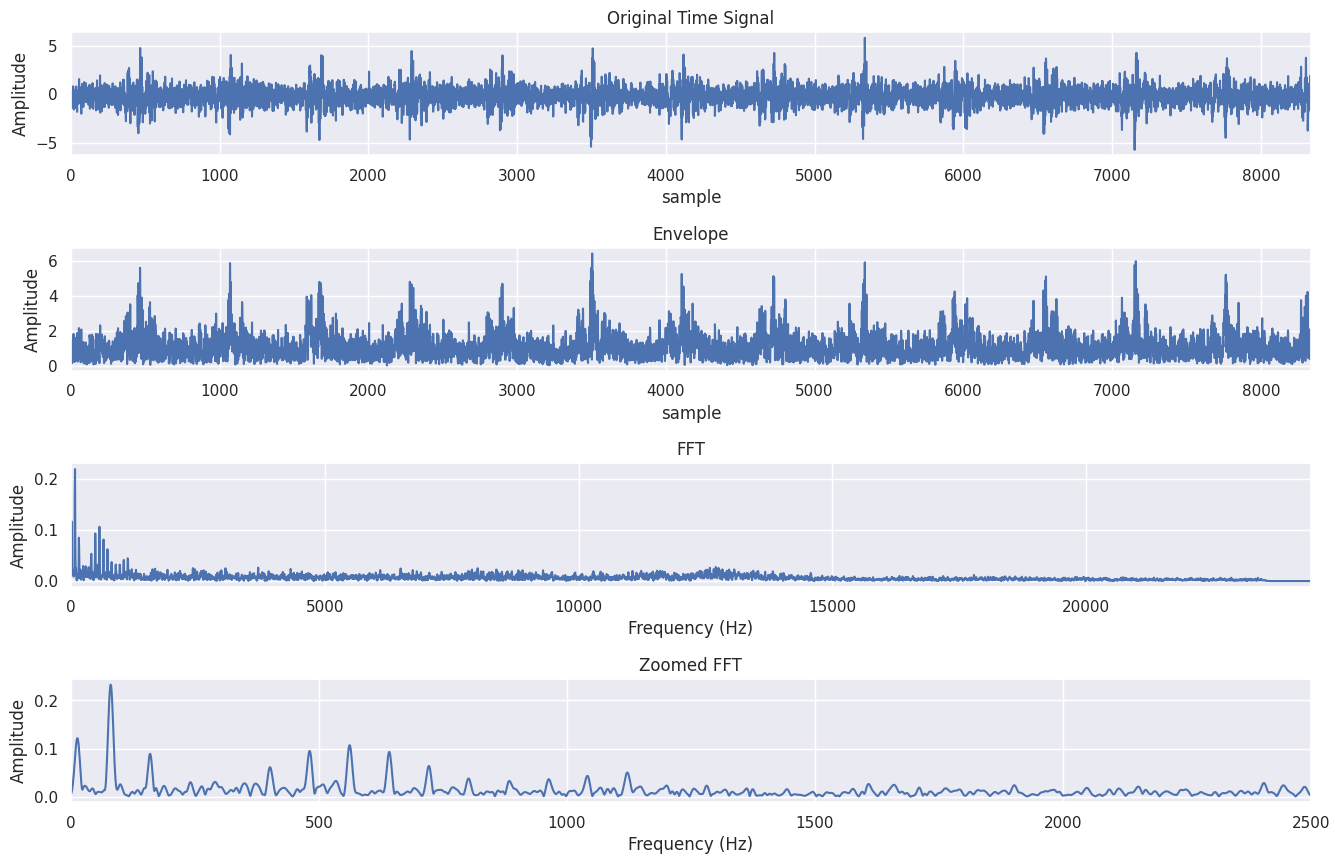

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 8337)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 8337)


sns.lineplot(ax=axes[2], x = fft_freq_axis(8337, 48828), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 24424)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 2500, 2500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 2500)


plt.subplots_adjust(hspace = 0.75)
fig.show()

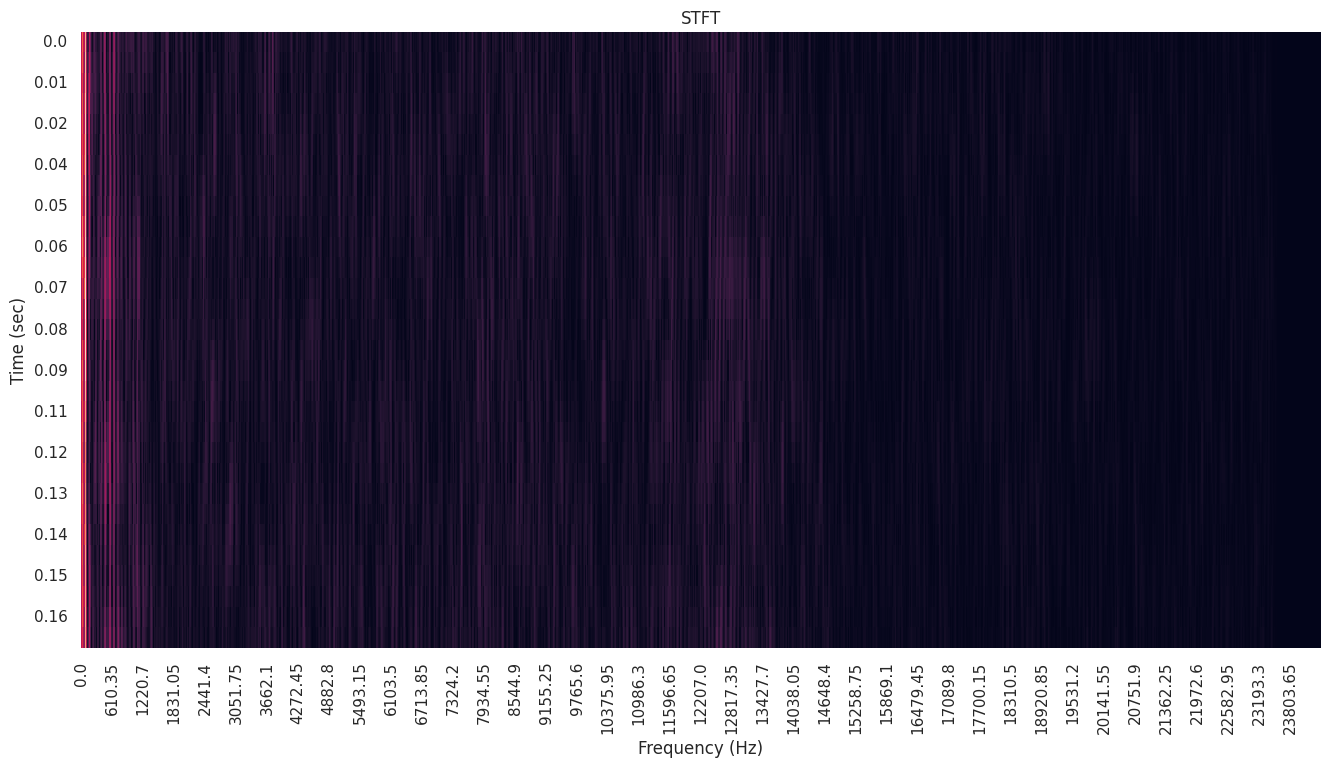

In [18]:
t = np.linspace(0, 0.1707, 30)
f = fft_freq_axis(2400, 48828)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::30])
ax.set_yticks(ax.get_yticks()[::2])


fig.show()